#LENDING CULB CASE STUDY


##Problem Statement:
As a part of a Consumer Lending Finance Company, which specialises in lending various types of loans, our case study goal is to identify the patterns which indicates if a loan is likely to Default. When the company receives a loan application, it has to make a decision for loan approval based on applicant's profile. This decisioning is associated with 2 kinds of risks;

If the applicant is likely to pay the loan, not approving such loan will result in loss for the company;
If the applicant is likely to default the loan, approving such loan application will also result in loss.
The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. We need to perform EDA to understand how consumer attributes and loan attributes infulence the decisioning. In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

##Data Loading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# EDA prcess improving Dependency
!pip install dataprep

In [ ]:
from dataprep.eda import plot_correlation

In [ ]:
#importing data 
loan = pd.read_csv('loan.csv')
dictionary = pd.read_excel('Data_Dictionary.xlsx')

In [ ]:
#loan data
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6849,891438,1108225,15000,15000,15000.0,60 months,11.71%,331.48,B,B3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6850,890158,1106736,6000,6000,6000.0,60 months,9.91%,127.22,B,B1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6851,853229,1065387,12000,12000,12000.0,36 months,6.03%,365.23,A,A1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6852,891428,1108211,10625,10625,10600.0,36 months,6.62%,326.23,A,A2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
# Data Dictionary
dictionary

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


In [ ]:
#removing nulls in Dictionary
dictionary_new = dictionary.dropna(1,"all")

In [ ]:
#comparing the variables in "loan" and "dictionary" and removing uncommon variables
set(loan.columns) - set(dictionary_new["LoanStatNew"])

{'total_rev_hi_lim', 'verification_status_joint'}

In [ ]:
#dropping {'total_rev_hi_lim', 'verification_status_joint'} since they are not useful for analysis
loan = loan.drop(['total_rev_hi_lim', 'verification_status_joint'],1)

In [ ]:
#shape of loan
print(loan.shape)

(6854, 109)


In [ ]:
# loan info
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6854 entries, 0 to 6853
Columns: 109 entries, id to total_il_high_credit_limit
dtypes: float64(75), int64(10), object(24)
memory usage: 5.7+ MB


In [ ]:
#datatypes present in loan
print(loan.dtypes)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 109, dtype: object


##Data PreProcessing

In [ ]:
# finding duplicate rows and removing it
loan.drop_duplicates(subset=["id"])

#finding duplicate columns and removing it
loan = loan.loc[:,~loan.columns.duplicated()]

In [ ]:
print(loan.shape[0])
print(loan.shape[1])

6854
109


In [ ]:
# Since shape is same as before there are no duplicates

In [ ]:
#finding number of rows with null values
print('Number of Null Valued Rows:' , loan.isnull().all(axis=1).sum() )

#finding number of Columns with null values
print('Number of Null Valued Columns:' , loan.isnull().all(axis=0).sum() )

Number of Null Valued Rows: 0
Number of Null Valued Columns: 52


In [ ]:
#indexes of null valued columns
loan.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
                              ... 
tax_liens                        1
tot_hi_cred_lim               6854
total_bal_ex_mort             6854
total_bc_limit                6854
total_il_high_credit_limit    6854
Length: 109, dtype: int64

In [ ]:
#dropping columns having null values
loan.dropna( how='all' , axis=1 , inplace=True )

In [ ]:
loan.shape

(6854, 57)

In [ ]:
#droppinf columns having null value through iloc method 
loan.drop(loan.iloc[:,53:105],inplace=True,axis=1)

In [ ]:
# we can drop some more coulmns which are not required in our analysis because of their null values
cols_to_drop = ["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d","member_id","url","emp_title","zip_code"]
loan.drop(labels=cols_to_drop,axis=1,inplace=True)

In [ ]:
loan.shape

(6854, 45)

In [ ]:
#finding unique values
unique_vals = loan.nunique()

In [ ]:
print(unique_vals)

id                            6854
loan_amnt                      575
funded_amnt                    615
funded_amnt_inv               1054
term                             2
int_rate                        41
installment                   2754
grade                            7
sub_grade                       35
emp_length                      11
home_ownership                   3
annual_inc                    1250
verification_status              3
issue_d                          4
loan_status                      3
pymnt_plan                       1
purpose                         13
title                         2909
addr_state                      45
dti                           2413
delinq_2yrs                      7
earliest_cr_line               442
inq_last_6mths                   9
open_acc                        32
pub_rec                          3
revol_bal                     6068
revol_util                    1008
total_acc                       62
initial_list_status 

In [ ]:
#checking for coulmns with a single unique value 

unique_cols = ((unique_vals[unique_vals==loan.shape[0]].index) | (unique_vals[unique_vals==1].index) )

In [ ]:
#converting into list

cols_list = list(unique_cols)

In [ ]:
#removing columns with same value 
loan.drop(columns=cols_list,inplace=True)

In [ ]:
loan.shape

(6854, 38)

##post approval columns can be removed
 
delinq_2yrs

revol_bal


out_prncp


total_pymnt


total_rec_prncp


total_rec_int


total_rec_late_fee


recoveries


collection_recovery_fee


last_pymnt_d


last_pymnt_amnt


next_pymnt_d


chargeoff_within_12_mths


mths_since_last_delinq


mths_since_last_record

In [ ]:
post_approval_cols = ['delinq_2yrs', 'revol_bal', 'out_prncp','out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp','total_rec_int', 'total_rec_late_fee', 'recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt','title']

In [ ]:
loan.drop(columns=post_approval_cols,inplace=True)

In [ ]:
loan.shape

(6854, 24)

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6854 entries, 0 to 6853
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            6854 non-null   int64  
 1   funded_amnt          6854 non-null   int64  
 2   funded_amnt_inv      6854 non-null   float64
 3   term                 6854 non-null   object 
 4   int_rate             6854 non-null   object 
 5   installment          6854 non-null   float64
 6   grade                6854 non-null   object 
 7   sub_grade            6854 non-null   object 
 8   emp_length           6611 non-null   object 
 9   home_ownership       6854 non-null   object 
 10  annual_inc           6854 non-null   float64
 11  verification_status  6854 non-null   object 
 12  issue_d              6854 non-null   object 
 13  loan_status          6854 non-null   object 
 14  purpose              6854 non-null   object 
 15  addr_state           6854 non-null   o

Replacing null values

In [ ]:
# finding mode value for emp_length
loan.emp_length.mode()[0]

'10+ years'

In [ ]:
# adding mode value for emp_length
loan.emp_length.fillna(loan.emp_length.mode()[0],inplace=True)

In [ ]:
# adding mode value last_credit_pull_d
loan.last_credit_pull_d.fillna(loan.last_credit_pull_d.mode()[0],inplace=True)



In [ ]:
#null value columns
print(loan[loan.columns[loan.isnull().any()]].isnull().sum())

revol_util    3
dtype: int64


In [ ]:
#adding median value revol_util
loan.revol_util.fillna(loan.revol_util.median(),inplace=True)

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6854 entries, 0 to 6853
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            6854 non-null   int64  
 1   funded_amnt          6854 non-null   int64  
 2   funded_amnt_inv      6854 non-null   float64
 3   term                 6854 non-null   object 
 4   int_rate             6854 non-null   object 
 5   installment          6854 non-null   float64
 6   grade                6854 non-null   object 
 7   sub_grade            6854 non-null   object 
 8   emp_length           6854 non-null   object 
 9   home_ownership       6854 non-null   object 
 10  annual_inc           6854 non-null   float64
 11  verification_status  6854 non-null   object 
 12  issue_d              6854 non-null   object 
 13  loan_status          6854 non-null   object 
 14  purpose              6854 non-null   object 
 15  addr_state           6854 non-null   o

Standardizing values


datetime functions


In [ ]:
# generic function

import datetime
def convert(date_time):
  format = '%b-%y'
  d = datetime.datetime.strptime(date_time,format).strftime("%Y-%m")
  return d

In [ ]:

loan.issue_d = loan.issue_d.apply(lambda x: convert(x))
loan.earliest_cr_line = loan.earliest_cr_line.apply(lambda x: convert(x))

In [ ]:

loan.rename(columns={'term':'term_in_months'},inplace=True)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,last_credit_pull_d
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,credit_card,AZ,27.65,1985-01,1,3,0,83.70%,9,May-16
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,car,GA,1.00,1999-04,5,3,0,9.40%,4,Sep-13
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,small_business,IL,8.72,2001-11,2,2,0,98.50%,10,May-16
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,other,CA,20.00,1996-02,1,10,0,21%,37,Apr-16
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,other,OR,17.94,1996-01,0,15,0,53.90%,38,May-16


In [ ]:

# converting into numeric columns

numeric_cols = ['pub_rec','total_acc','loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti','inq_last_6mths','open_acc']
loan[numeric_cols] = loan[numeric_cols].apply(pd.to_numeric)

In [ ]:
# int_rate & revol_util has % symbol which can be removed

loan['int_rate'] = loan['int_rate'].apply(str).str.rstrip('%')
loan['revol_util'] = loan['revol_util'].apply(str).str.rstrip('%')

In [ ]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,last_credit_pull_d
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,credit_card,AZ,27.65,1985-01,1,3,0,83.70,9,May-16
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,car,GA,1.00,1999-04,5,3,0,9.40,4,Sep-13
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,small_business,IL,8.72,2001-11,2,2,0,98.50,10,May-16
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,other,CA,20.00,1996-02,1,10,0,21,37,Apr-16
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,other,OR,17.94,1996-01,0,15,0,53.90,38,May-16


In [ ]:
#checking loan_status column
loan.loan_status.value_counts()

Fully Paid     5190
Charged Off    1100
Current         564
Name: loan_status, dtype: int64

In [ ]:
#"Current" loan_status has no value in our analysis whatsoever and hence it can be dropped
# creating a new df loan_new without 'Current'

loan_new = loan[~(loan['loan_status']=='Current')]

In [ ]:
loan_new.loan_status.value_counts()


Fully Paid     5190
Charged Off    1100
Name: loan_status, dtype: int64

In [ ]:
#naming 'Fully Paid' as 0 and 'Charged-Off' as 1 for easier analysis
loan_new.loan_status = loan_new.loan_status.map({'Fully Paid':0 , 'Charged Off':1})
loan_new.loan_status.head()

0    0
1    1
2    0
3    0
5    0
Name: loan_status, dtype: int64

In [ ]:
loan_new.shape

(6290, 24)

##Outlier Treatment

In [ ]:
loan_new.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,loan_status,dti,inq_last_6mths,open_acc,pub_rec,total_acc
count,6290.000000,6290.000000,6290.000000,6290.000000,6290.000000,0.0,6290.000000,6290.000000,6290.000000,6290.000000,6290.000000
mean,12524.236884,12447.996820,12398.830956,366.132580,68317.474016,NaN,14.079544,0.861526,9.439587,0.040541,22.289825
std,8218.750342,8130.343294,8095.869009,225.757164,43354.610767,NaN,6.531060,1.018699,4.191731,0.199643,10.922606
min,1000.000000,1000.000000,750.000000,30.440000,6000.000000,NaN,0.000000,0.000000,2.000000,0.000000,3.000000
25%,6000.000000,6000.000000,6000.000000,196.770000,42000.000000,NaN,9.062500,0.000000,6.000000,0.000000,14.000000
50%,10500.000000,10400.000000,10400.000000,325.740000,60000.000000,NaN,14.145000,1.000000,9.000000,0.000000,21.000000
75%,16000.000000,16000.000000,16000.000000,480.282500,82000.000000,NaN,19.150000,1.000000,12.000000,0.000000,29.000000
max,35000.000000,35000.000000,35000.000000,1283.500000,725000.000000,NaN,29.920000,8.000000,34.000000,2.000000,79.000000


In [ ]:
#from the table we can see annual income has outliers


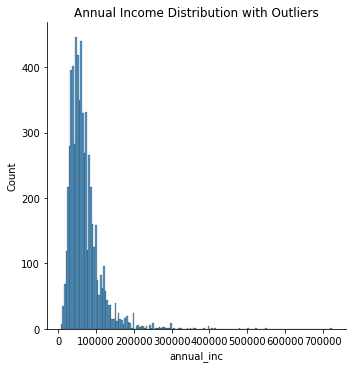

In [ ]:
# let us see the distribution of annual income with outliers

sns.displot(loan_new['annual_inc']).set(title='Annual Income Distribution with Outliers')


In [ ]:
# boxplot for annual income with outliers

[Text(0.5, 1.0, 'Boxplot')]

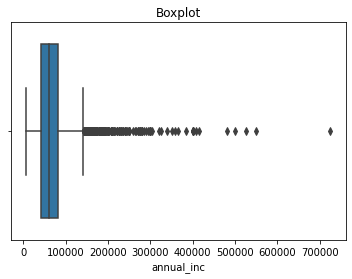

In [ ]:
sns.boxplot(loan_new['annual_inc']).set(title='Boxplot')

In [ ]:
#removing outliers
loan_new =loan_new[loan_new["annual_inc"] < loan_new['annual_inc'].quantile(0.97)]

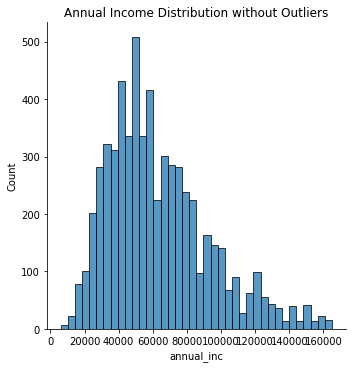

In [ ]:
# let us see the distribution of annual income without outliers

sns.displot(loan_new['annual_inc']).set(title='Annual Income Distribution without Outliers')


[Text(0.5, 1.0, 'Boxplot')]

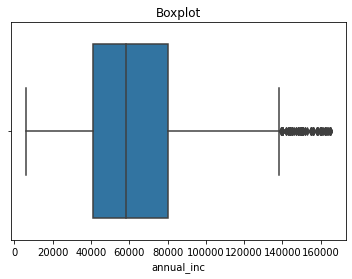

In [ ]:
# boxplot for annual income with outliers
sns.boxplot(loan_new['annual_inc']).set(title='Boxplot')



In [ ]:
#exploring data for loan amount


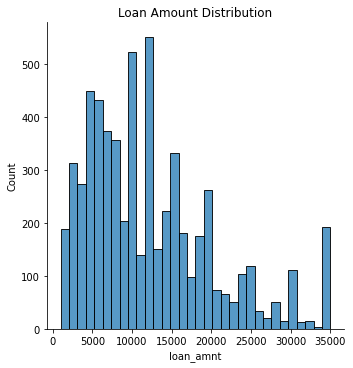

In [ ]:
sns.displot(loan_new['loan_amnt']).set(title='Loan Amount Distribution')


[Text(0.5, 1.0, 'Boxplot')]

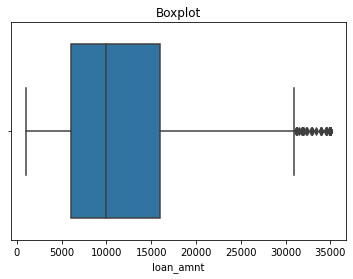

In [ ]:
sns.boxplot(loan_new['loan_amnt']).set(title='Boxplot')


In [ ]:
loan_new.shape

(6100, 24)

In [ ]:
loan_new.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,loan_status,dti,inq_last_6mths,open_acc,pub_rec,total_acc
count,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000
mean,12238.360656,12163.676230,12115.500104,357.819892,63233.324033,0.176557,14.221279,0.853934,9.384098,0.040656,22.011475
std,7986.174543,7897.839187,7864.197413,218.225458,29746.177407,0.381325,6.522453,1.009616,4.155232,0.199161,10.739681
min,1000.000000,1000.000000,750.000000,30.440000,6000.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
25%,6000.000000,6000.000000,6000.000000,193.782500,40800.000000,0.000000,9.250000,0.000000,6.000000,0.000000,14.000000
50%,10000.000000,10000.000000,10000.000000,319.960000,58108.000000,0.000000,14.340000,1.000000,9.000000,0.000000,20.000000
75%,16000.000000,16000.000000,15975.000000,469.360000,80000.000000,0.000000,19.332500,1.000000,12.000000,0.000000,28.000000
max,35000.000000,35000.000000,35000.000000,1276.600000,165000.000000,1.000000,29.920000,8.000000,34.000000,2.000000,63.000000


In [ ]:
loan_new.grade.dtypes

dtype('O')

#Univariate Analysis

##Univariate Analysis on Categorical variables

###1. Grade

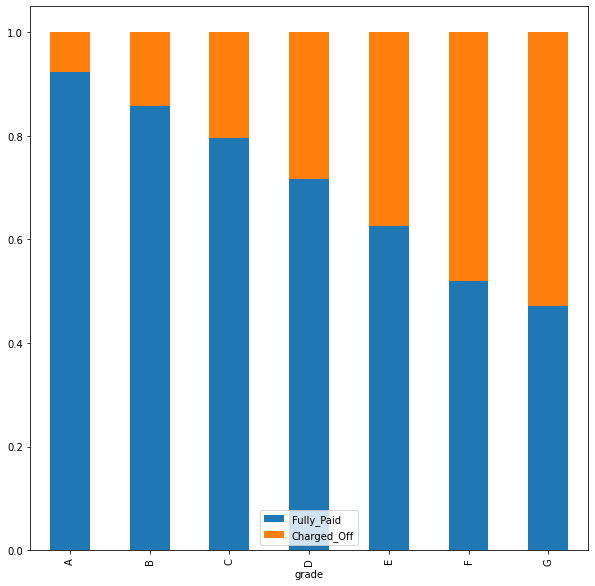

In [ ]:
loan_grade = pd.crosstab(loan_new['grade'],loan_new['loan_status'] , normalize='index')
loan_grade.plot(kind='bar' , stacked=True , figsize=[10,10] )
plt.legend(['Fully_Paid','Charged_Off'])
plt.show()

###Observations:

Borrowers with A Grade have low chances of defaulting 

Percantage of defaulting increase from A to G

###2. Sub-Grade

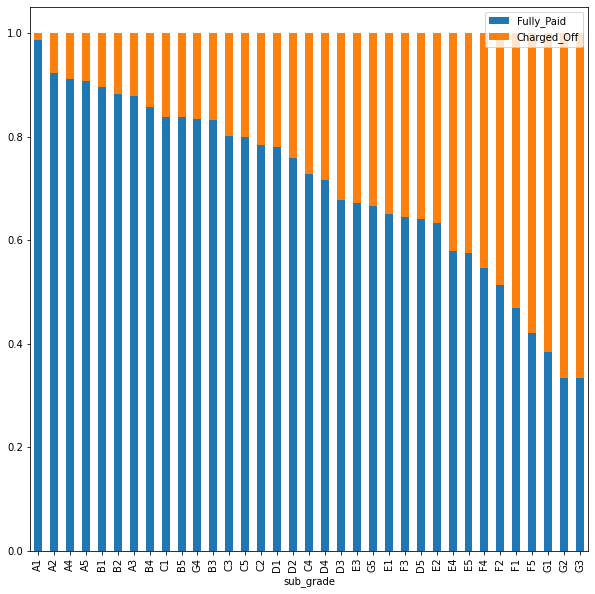

In [ ]:
loan_sub_grade = pd.crosstab(loan_new['sub_grade'],loan_new['loan_status'] , normalize='index').sort_values(by=1)
loan_sub_grade.plot(kind='bar' , stacked=True , figsize=[10,10])
plt.legend(['Fully_Paid','Charged_Off'])
plt.show()



###Observations:

G5 G2 G3 F5 have more than 50% default rate

###3. Home Ownership

In [ ]:
loan_new.home_ownership.value_counts()

RENT        3019
MORTGAGE    2604
OWN          477
Name: home_ownership, dtype: int64

In [ ]:
loan_new.home_ownership.replace(to_replace =['NONE'] , value = 'OTHER' , inplace=True)

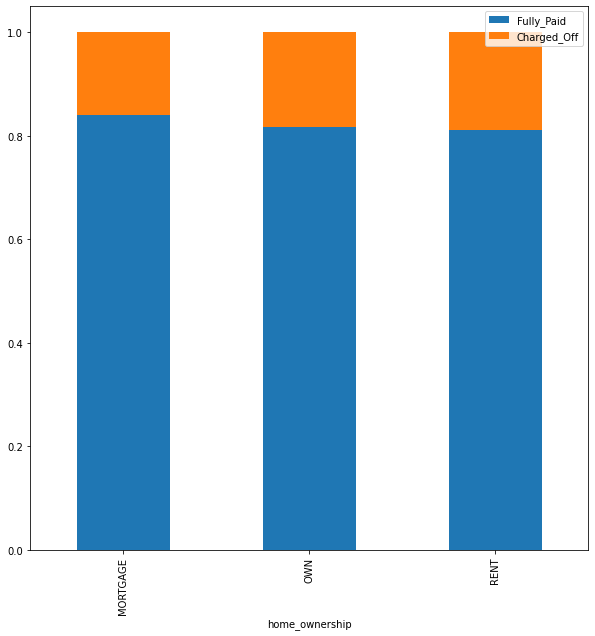

In [ ]:
loan_home_ownership = pd.crosstab(loan_new['home_ownership'],loan_new['loan_status'] , normalize='index')
loan_home_ownership.plot(kind='bar' , stacked=True , figsize=[10,10])
plt.legend(['Fully_Paid','Charged_Off'])
plt.show()

###Obsevations:

No conclusion can be drawn since variables are similar

###4. Verification Status

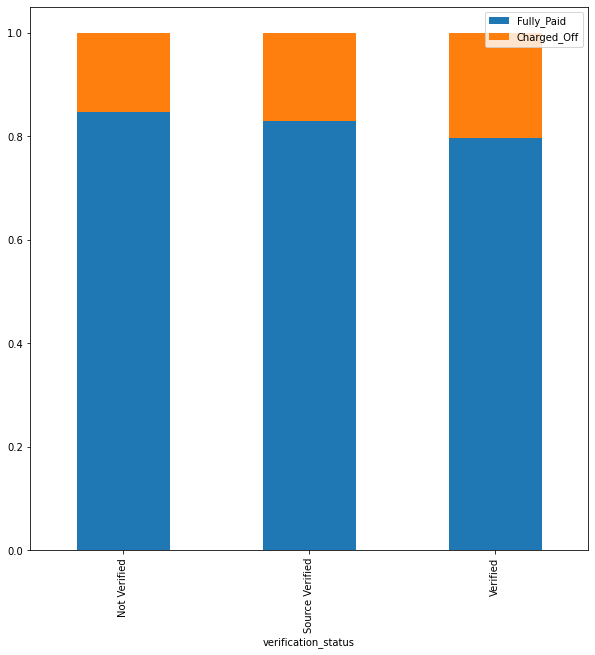

In [ ]:
loan_ver_stat = pd.crosstab(loan_new['verification_status'],loan_new['loan_status'] , normalize = 'index' )
loan_ver_stat.plot(kind='bar' , stacked=True , figsize=[10,10])
plt.legend(['Fully_Paid','Charged_Off'])
plt.show()

###Observations:

Non-Verified customers have a slightly higher default rate than others

###5. Purpose

In [ ]:
loan_new.purpose.value_counts()

debt_consolidation    3189
credit_card           1064
other                  498
home_improvement       332
small_business         235
major_purchase         195
car                    167
wedding                119
medical                108
moving                  69
house                   57
vacation                55
renewable_energy        12
Name: purpose, dtype: int64

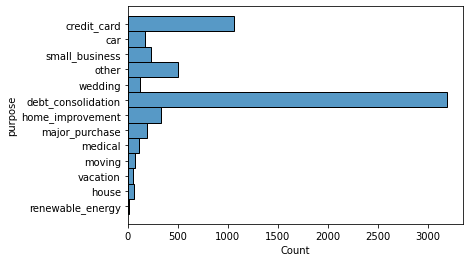

In [ ]:
sns.histplot(y='purpose' , data=loan_new)
plt.show()

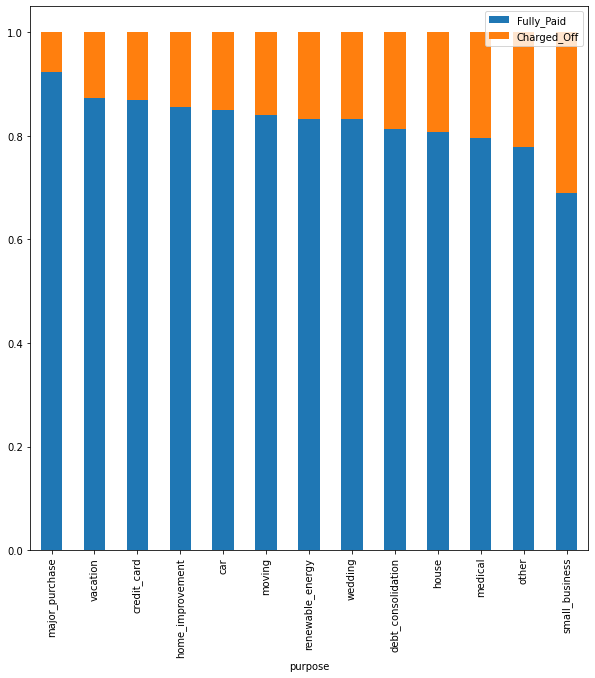

In [ ]:
loan_pur = pd.crosstab(loan_new['purpose'],loan_new['loan_status'] , normalize = 'index' ).sort_values(by=1)
loan_pur.plot(kind='bar' , stacked=True , figsize=[10,10])
plt.legend(['Fully_Paid','Charged_Off'])
plt.show()

###Observations:

Loans taken for Small Buisnesses have the highest default rate

###6. State of Borrower (Location)

In [ ]:
loan_new.addr_state.value_counts()

CA    1119
NY     575
FL     466
TX     427
NJ     271
IL     251
PA     215
GA     203
VA     201
OH     196
NC     166
MA     149
WA     147
MD     134
AZ     130
CT     118
MO     115
MN     101
MI      98
CO      97
WI      82
NV      76
OR      66
LA      65
SC      65
AL      64
KS      53
UT      51
KY      48
OK      47
AR      43
HI      42
RI      32
DC      29
WV      24
NH      23
NM      21
AK      19
DE      17
SD      15
MT      15
VT      11
WY      11
MS       1
TN       1
Name: addr_state, dtype: int64

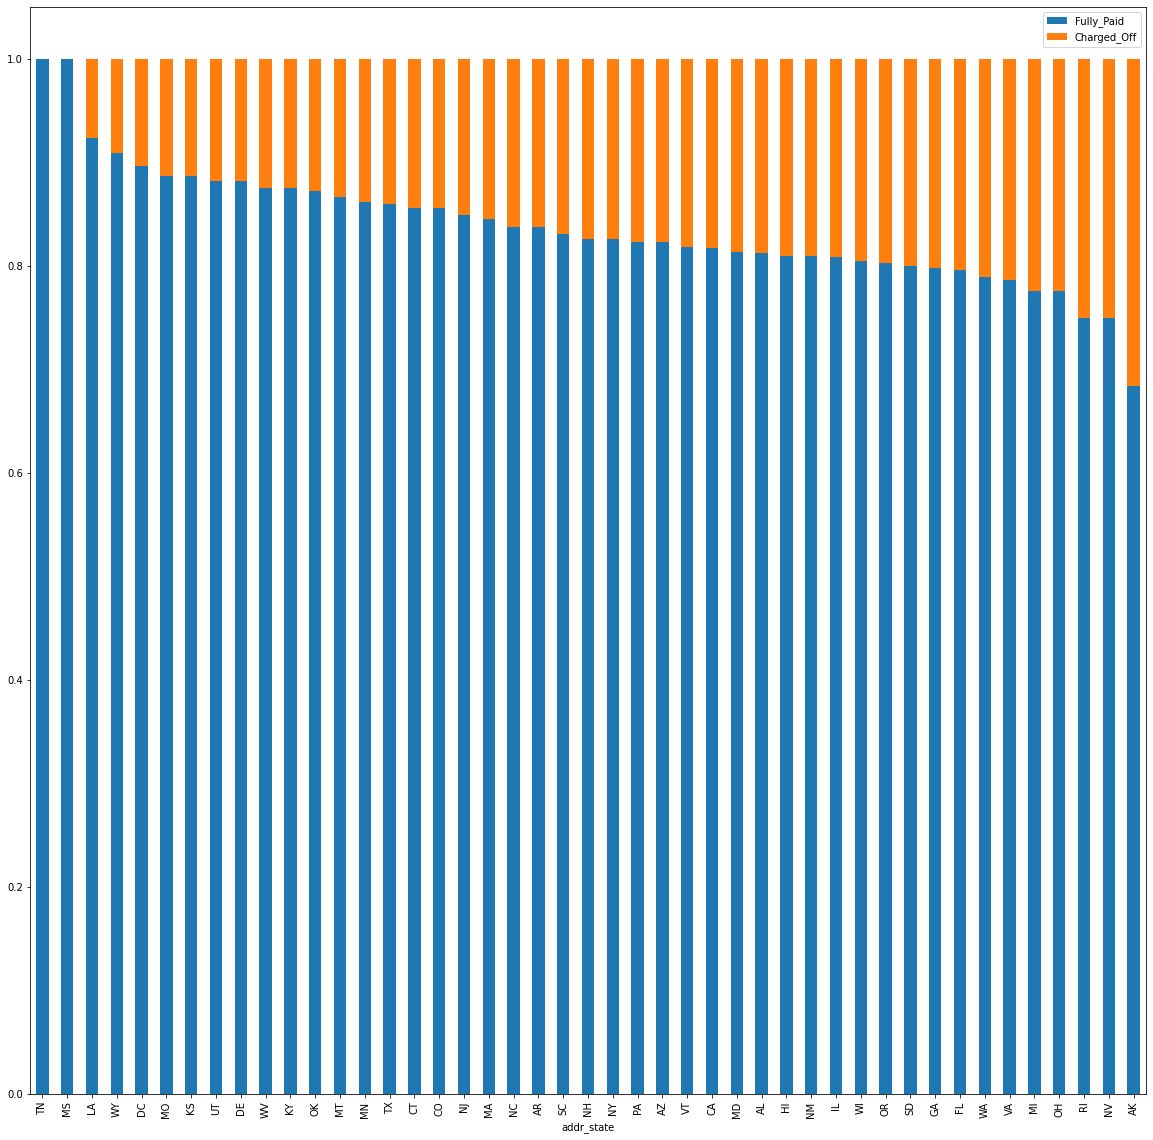

In [ ]:
loan_sddr = pd.crosstab(loan_new['addr_state'],loan_new['loan_status'] , normalize = 'index' ).sort_values(by=1)
loan_sddr.plot(kind='bar' , stacked=True , figsize=[20,20])
plt.legend(['Fully_Paid','Charged_Off'])
plt.show()

###Observations:

Borrowers from the state of New York tend to default significantly more than other states

###7.open_acc : no of open credit line in credit file 

In [ ]:
loan_new.open_acc.value_counts()

7     690
8     663
9     619
6     598
10    531
11    445
5     436
12    362
13    287
4     281
14    238
15    185
3     175
16    128
17    127
18     76
2      71
19     61
20     33
21     28
22     20
23     14
24      9
25      7
26      5
28      2
30      2
27      2
29      2
34      1
32      1
33      1
Name: open_acc, dtype: int64

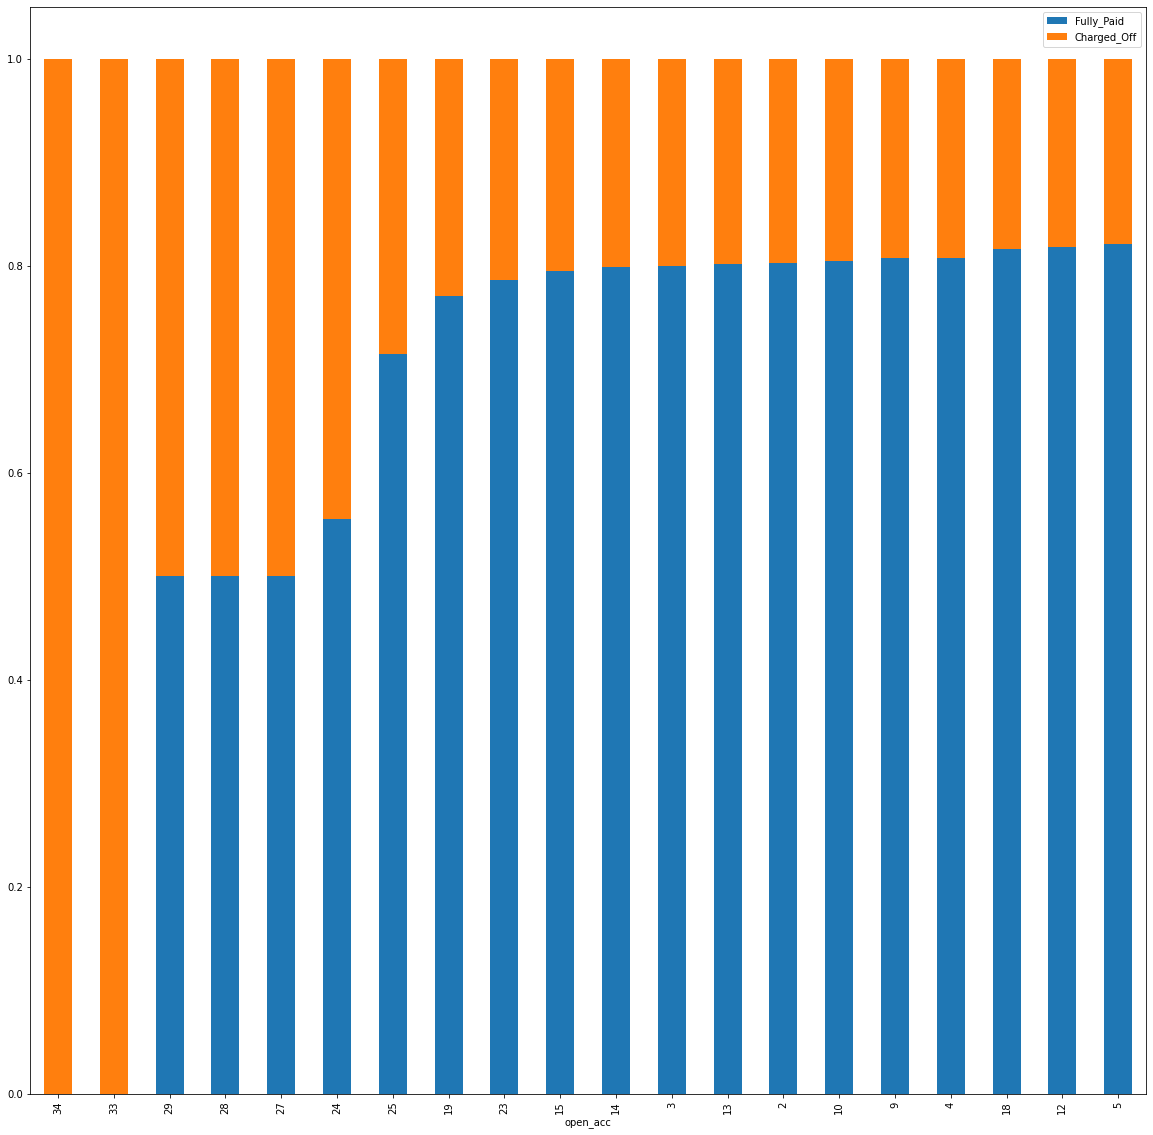

In [ ]:
loan_oacc = pd.crosstab(loan_new['open_acc'],loan_new['loan_status'] , normalize = 'index' ).sort_values(by=1 , ascending=False)
loan_oacc.head(20).plot(kind='bar' , stacked=True , figsize=[20,20])
plt.legend(['Fully_Paid','Charged_Off'])
plt.show()

###Observations:

Borrowers with large credit lines are likely to default

###8. Term in Months

In [ ]:
loan_new.term_in_months.value_counts()

 36 months    4474
 60 months    1626
Name: term_in_months, dtype: int64

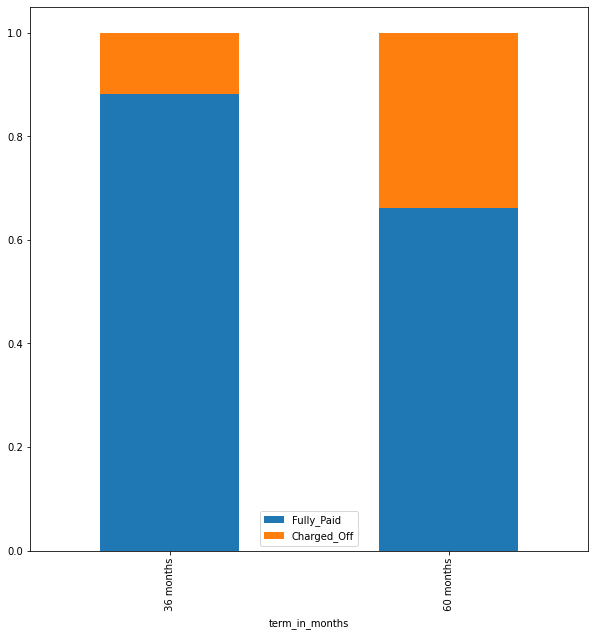

In [ ]:
loan_term = pd.crosstab(loan_new['term_in_months'],loan_new['loan_status'] , normalize = 'index' ).sort_values(by=1)
loan_term.plot(kind='bar' , stacked=True , figsize=[10,10])
plt.legend(['Fully_Paid','Charged_Off'])
plt.show()

###Oservations:

Borrowers with term of 60 months are more likely to default

###9. Number of derogatory public records

In [ ]:
loan_new.pub_rec.value_counts()

0    5854
1     244
2       2
Name: pub_rec, dtype: int64

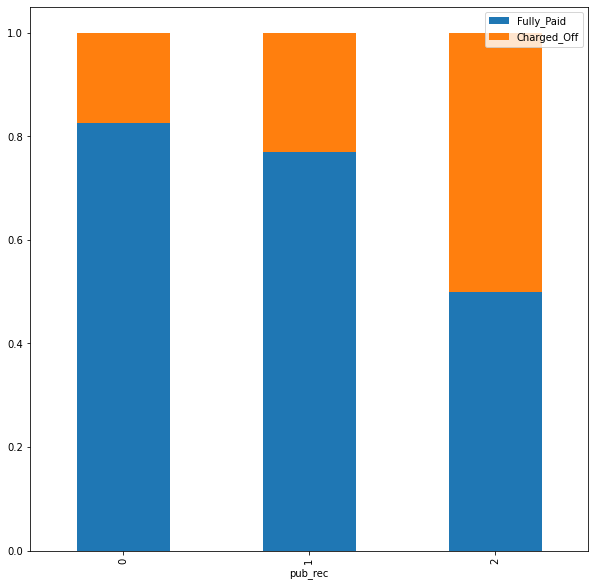

In [ ]:
loan_pub = pd.crosstab(loan_new['pub_rec'],loan_new['loan_status'] , normalize = 'index' ) 
loan_pub.plot(kind='bar' , stacked=True , figsize=[10,10])
plt.legend(['Fully_Paid','Charged_Off'])
plt.show()

###Observations:

Borrowers with non zero derogatory public records are more likely to default

##Univariate Analysis on Numerical Variables (Continuos Variables)

###1. Annual Income of Borrower vs Loan Status

<function matplotlib.pyplot.show>

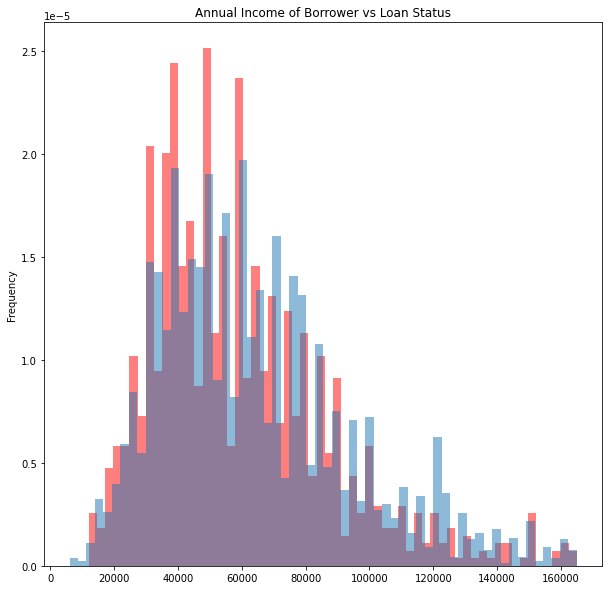

In [ ]:
plt.figure(figsize=[10,10])
loan_new.annual_inc [loan_new.loan_status==1].plot.hist(bins=60,density=True , alpha=0.5 , label='Charged_Off',color='Red')
loan_new.annual_inc [loan_new.loan_status==0].plot.hist(bins=60,density=True, alpha=0.5 , label='Fully_Paid')
plt.title("Annual Income of Borrower vs Loan Status")
plt.show

##Segmented Univariate

Creating bins from numerical data and converting them in categorical data

###1. Loan Amount

In [ ]:
loan_new.loan_amnt.describe()

count     6100.000000
mean     12238.360656
std       7986.174543
min       1000.000000
25%       6000.000000
50%      10000.000000
75%      16000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [ ]:
loan_new.loan_amnt_range = pd.cut(loan_new['loan_amnt'],[450,1000,1500,3500,6500,9000,13500,16000,18500,25000],10,)
loan_new.loan_amnt_range.unique()

[(3500.0, 6500.0], (1500.0, 3500.0], (9000.0, 13500.0], (6500.0, 9000.0], (450.0, 1000.0], (18500.0, 25000.0], (13500.0, 16000.0], NaN, (16000.0, 18500.0], (1000.0, 1500.0]]
Categories (9, interval[int64, right]): [(450, 1000] < (1000, 1500] < (1500, 3500] < (3500, 6500] <
                                         ... < (9000, 13500] < (13500, 16000] <
                                         (16000, 18500] < (18500, 25000]]

In [ ]:
loan_amnt_range = pd.crosstab(loan_new.loan_amnt_range , loan_new.loan_status , normalize = 'index')

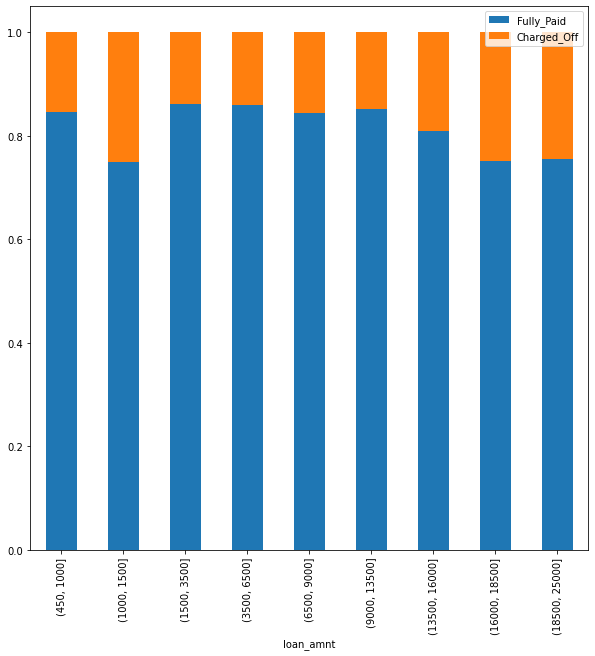

In [ ]:
loan_amnt_range.plot( kind = 'bar' , stacked = True , figsize=[10,10])
plt.legend(['Fully_Paid','Charged_Off'])
plt.show()

###Observations:

Higher the loan amount , higher the chances of defaulting


###2. Installment

In [ ]:
loan_new.installment.describe()

count    6100.000000
mean      357.819892
std       218.225458
min        30.440000
25%       193.782500
50%       319.960000
75%       469.360000
max      1276.600000
Name: installment, dtype: float64

In [ ]:
loan_new.installment_range = pd.cut(loan_new['installment'],[0,300,500,700,900,1200,1500],6,)


In [ ]:
loan_new.installment_range.value_counts()

(0, 300]        2752
(300, 500]      2038
(500, 700]       812
(700, 900]       335
(900, 1200]      147
(1200, 1500]      16
Name: installment, dtype: int64

In [ ]:
loan_installment_range = pd.crosstab(loan_new.installment_range , loan_new.loan_status , normalize = 'index')

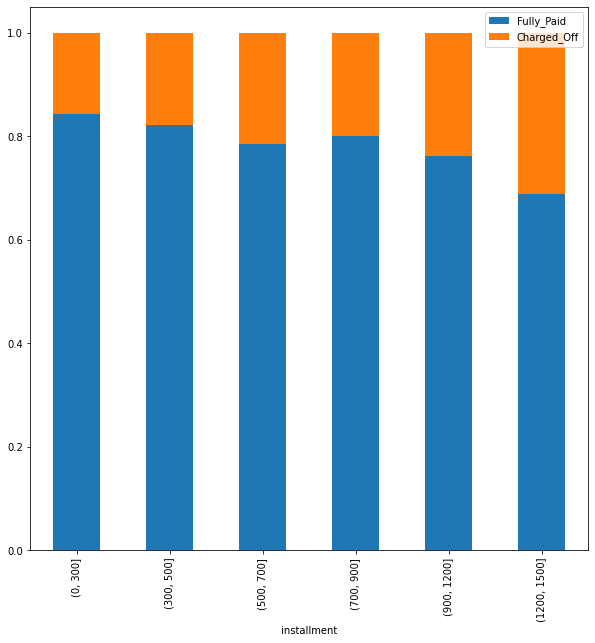

In [ ]:
loan_installment_range.plot( kind = 'bar' , stacked = True , figsize=[10,10])
plt.legend(['Fully_Paid','Charged_Off'])
plt.show()

###Observations:

Higher the Installments  , Higher the chance of Default

###3. Debt to Income Ratio

In [ ]:
loan_new.dti.describe()

count    6100.000000
mean       14.221279
std         6.522453
min         0.000000
25%         9.250000
50%        14.340000
75%        19.332500
max        29.920000
Name: dti, dtype: float64

In [ ]:
loan_new.dti_range = pd.cut(loan_new.dti , [-1,5,10,15,20,25,30],6)

In [ ]:
loan_new.dti_range.value_counts()

(15, 20]    1531
(10, 15]    1507
(20, 25]    1156
(5, 10]     1146
(-1, 5]      582
(25, 30]     178
Name: dti, dtype: int64

In [ ]:
dti_range = pd.crosstab(loan_new.dti_range , loan_new.loan_status , normalize='index')

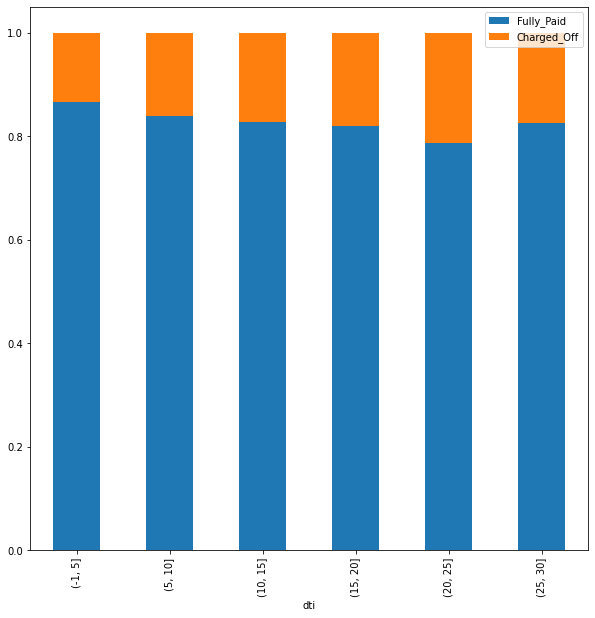

In [ ]:
dti_range.plot( kind = 'bar' , stacked = True , figsize=[10,10])
plt.legend(['Fully_Paid','Charged_Off'])
plt.show()

###Observations:

Higher the DTI Higher , the risk of defaulting

##Derived Metrics

###issue_d

In [ ]:
loan_new.issue_d_month = pd.DatetimeIndex(loan_new.issue_d).month
loan_new.issue_d_year = pd.DatetimeIndex(loan_new.issue_d).year
loan_new.drop(columns=['issue_d'],axis=1,inplace=True)

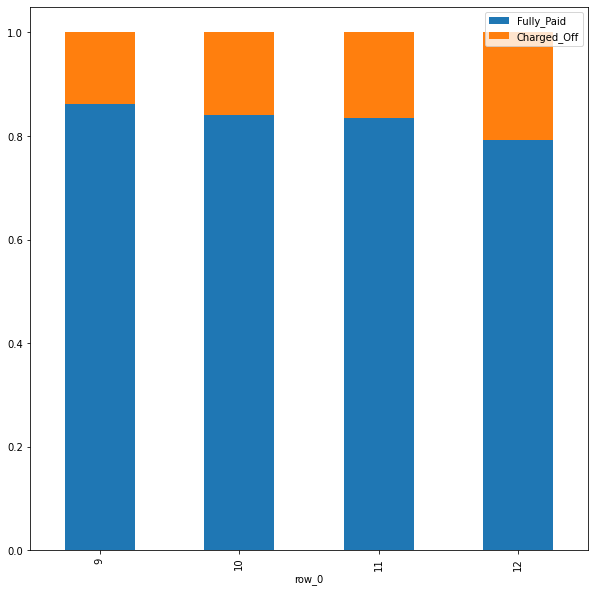

In [ ]:
issue_d_month =pd.crosstab(loan_new.issue_d_month , loan_new.loan_status , normalize='index').sort_values(by=1)
issue_d_month.plot(kind='bar' , stacked=True , figsize=[10,10])
plt.legend(['Fully_Paid','Charged_Off'])
plt.show()

###Observation

Borrowers in the later months tend to default more 

It maybe due to holidays


##Observations Infered from Univariate Analysis

1.The chances of Grade 'G' customer to be charged off is high 

2.The chances of Sub-Grade 'F5' customer to be charged off is high 

3.Most of the people with small business are having high chances to get charged off 

4.Most risky states from analysis is 'New York' with almost 60% get charged off



6.Borrowers with very large credit lines such as '33 or 38' are most likely to get charged off

7.Borrowers with term of payments in' 60 months' are more likely to default. 'Hence are charged off'

8.Borrowers with higher interest rate than '11.5%' could be possibly highly get charged off

9.Borrowers whose annuaa income is less than '70000' are most likely to takes loan and also most likely to get charged off

10.Most of people who likely to miss their loan in month of 'December' and 'May' likely to get charged off



##Bivariate Analysis

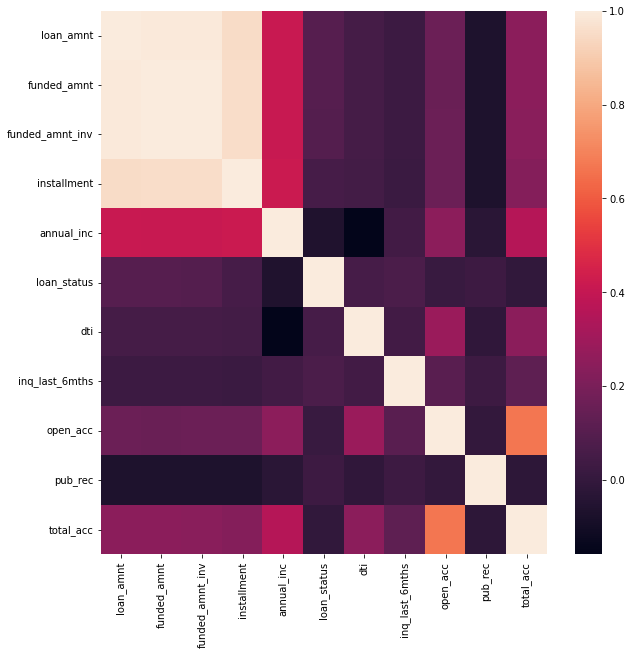

In [ ]:
#plotting a heatmap to find correlation
plt.figure(figsize=[10,10])
dataplot = sns.heatmap(loan_new.corr())
plt.show()

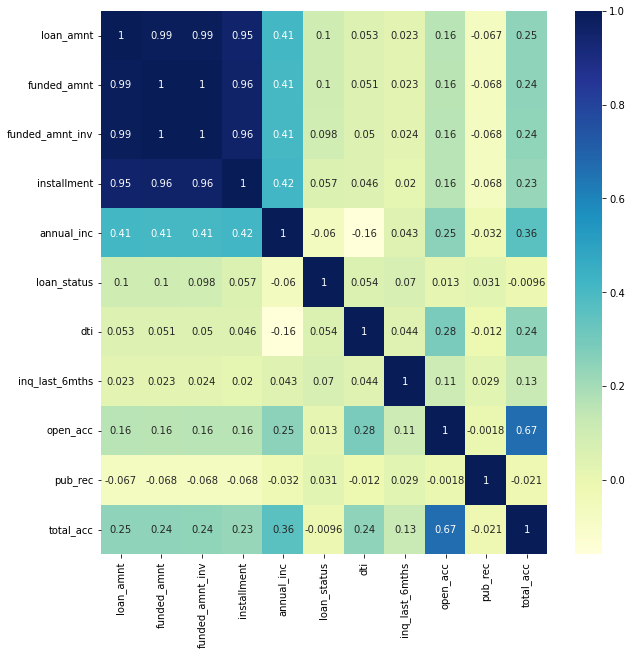

In [ ]:
plt.figure(figsize=[10,10])

dataplot = sns.heatmap(loan_new.corr() , cmap='YlGnBu' , annot=True)

###Oservations:

Loan Amount and Installments are correlative


In [ ]:
# correlation of interest rate with all columns

loan_new.int_rate.dtypes

dtype('O')

In [ ]:
loan_new['int_rate'] = pd.to_numeric(loan_new['int_rate'])

In [ ]:
loan_new.int_rate.dtypes

dtype('float64')


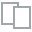
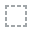
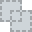
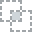
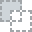
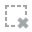
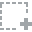
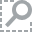
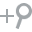
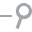
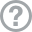
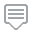
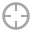
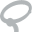
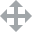
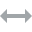
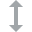
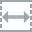
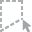
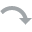
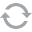
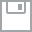
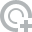
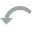
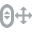
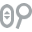
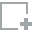
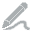
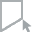
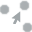
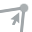
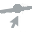

In [ ]:
plot_correlation(loan_new,'int_rate')

###1.loan purpose vs loan amount

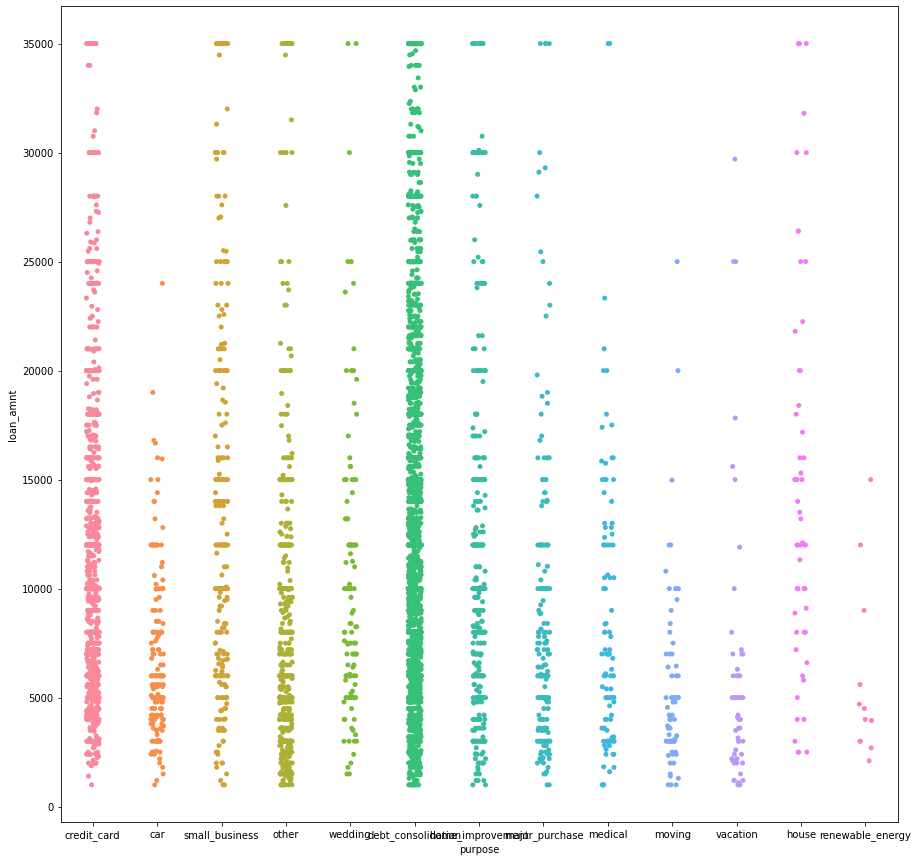

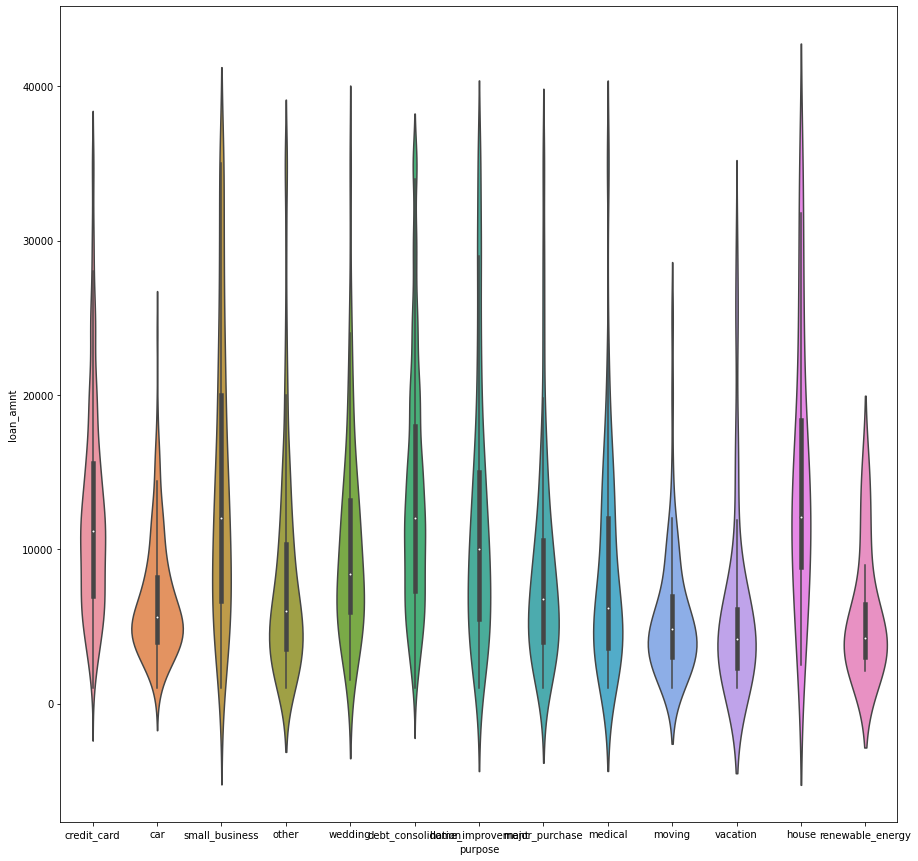

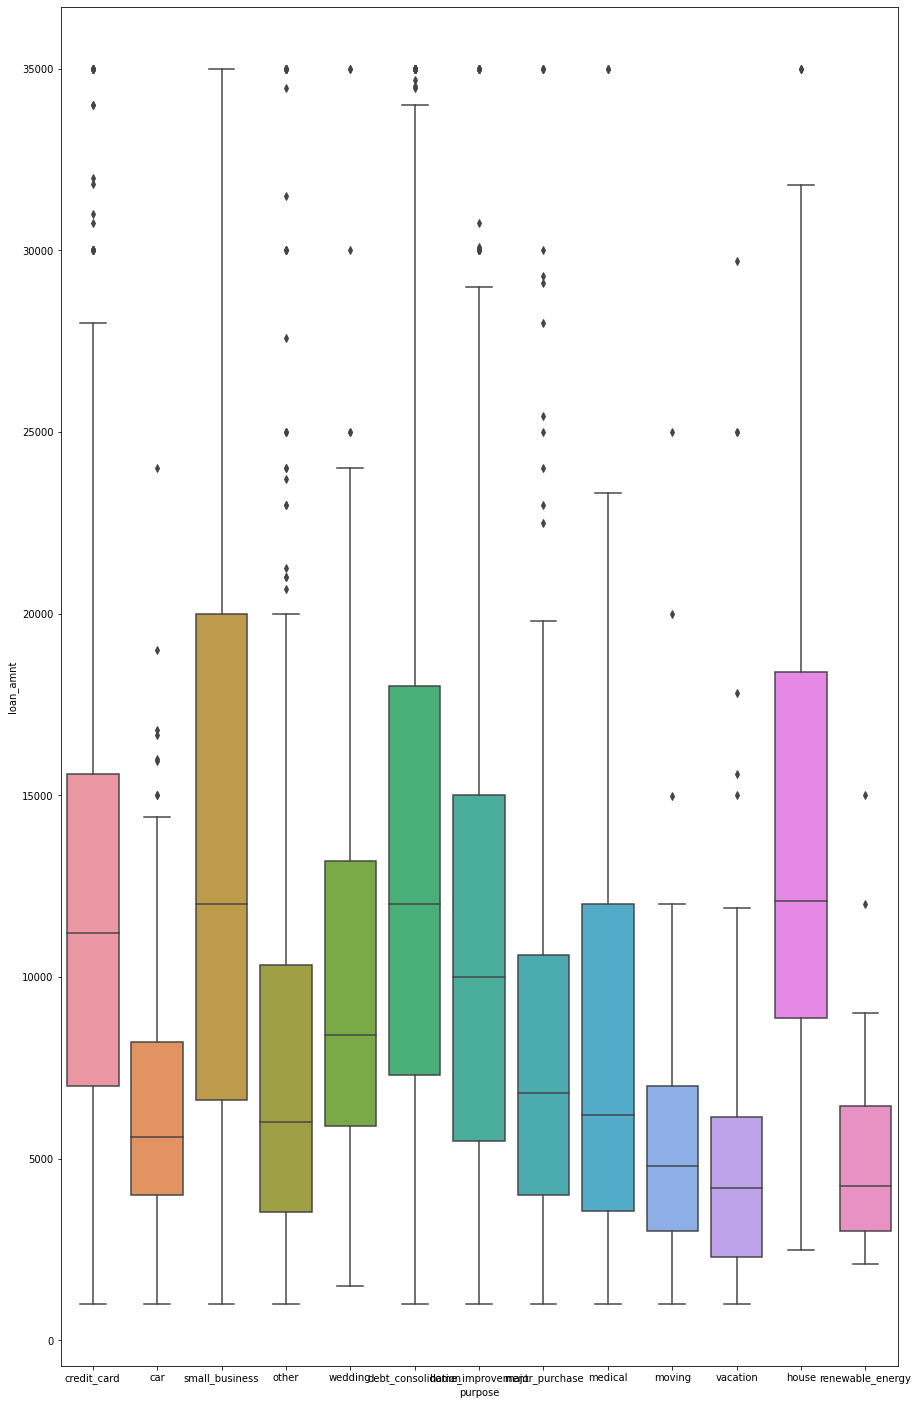

In [ ]:
plt.figure(figsize=[15,15])
sns.stripplot(x="purpose" , y="loan_amnt" , data=loan_new)
plt.show()

plt.figure(figsize=[15,15])
sns.violinplot(x="purpose" , y="loan_amnt" , data=loan_new)
plt.show()

plt.figure(figsize=[15,25])
sns.boxplot(x="purpose" , y="loan_amnt" , data=loan_new)
plt.show()

###Observations:

1.Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.

 2.Debt consolidation is second and Credit card comes 3rd.

###2.interest rate vs loan term

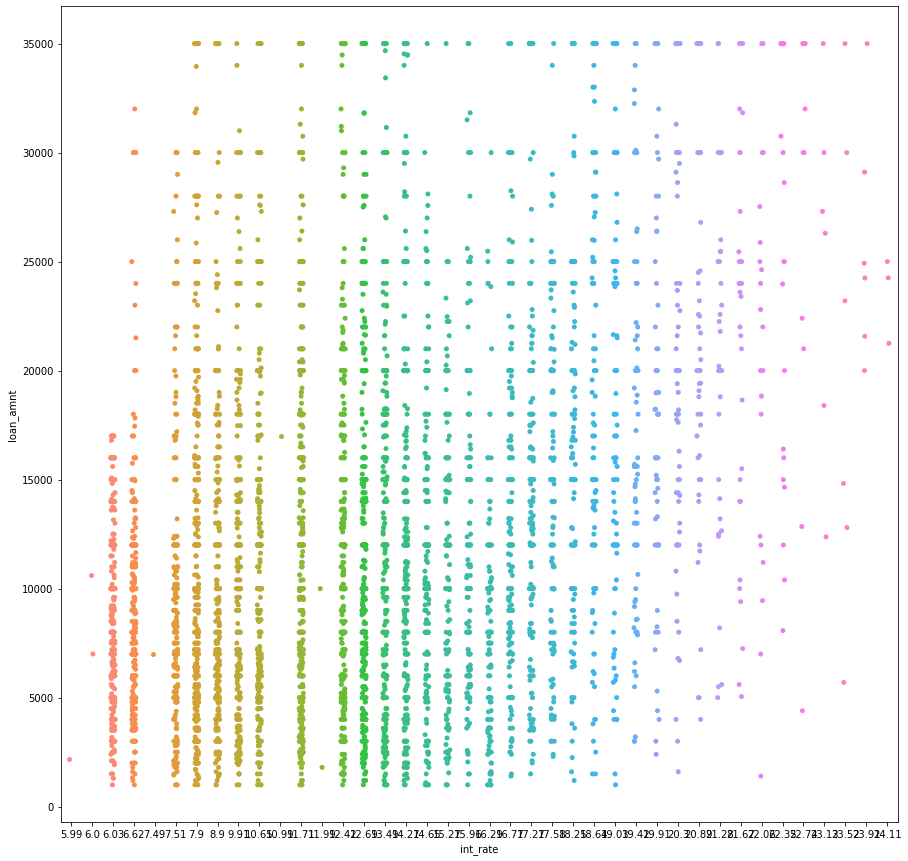

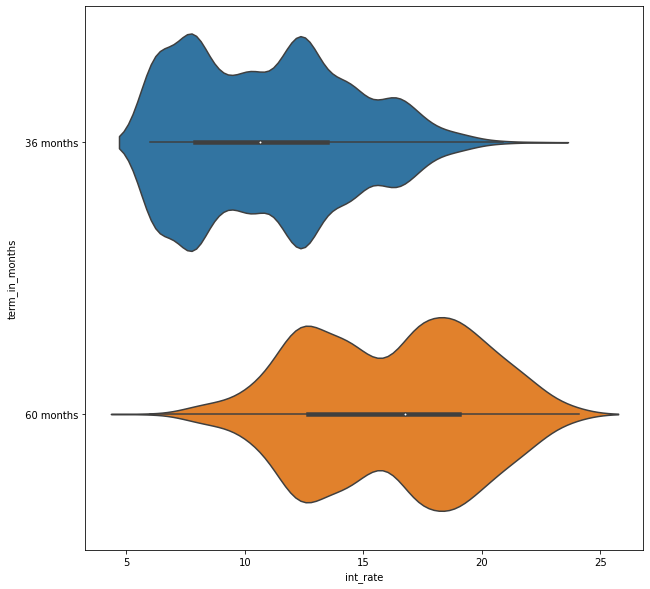

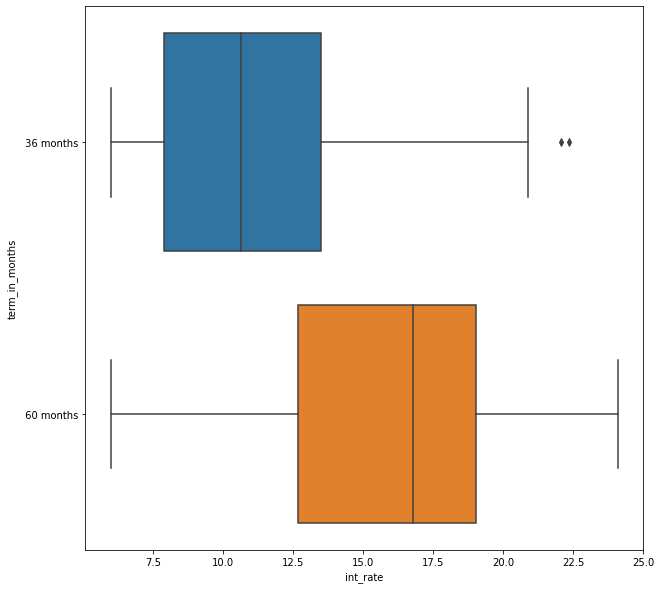

In [ ]:
plt.figure(figsize=[15,15])
sns.stripplot(x="int_rate" , y="loan_amnt" , data=loan_new)
plt.show()

plt.figure(figsize=[10,10])
sns.violinplot(x="int_rate" , y="term_in_months" , data=loan_new)
plt.show()

plt.figure(figsize=[10,10])
sns.boxplot(x="int_rate" , y="term_in_months" , data=loan_new)
plt.show()

###Observations:

Avearge intrest rate is higher for 60 months loan term.

 Most of the loans issued for longer term had higher intrest rates for repayement.

###3.Pupose vs Interest Rate

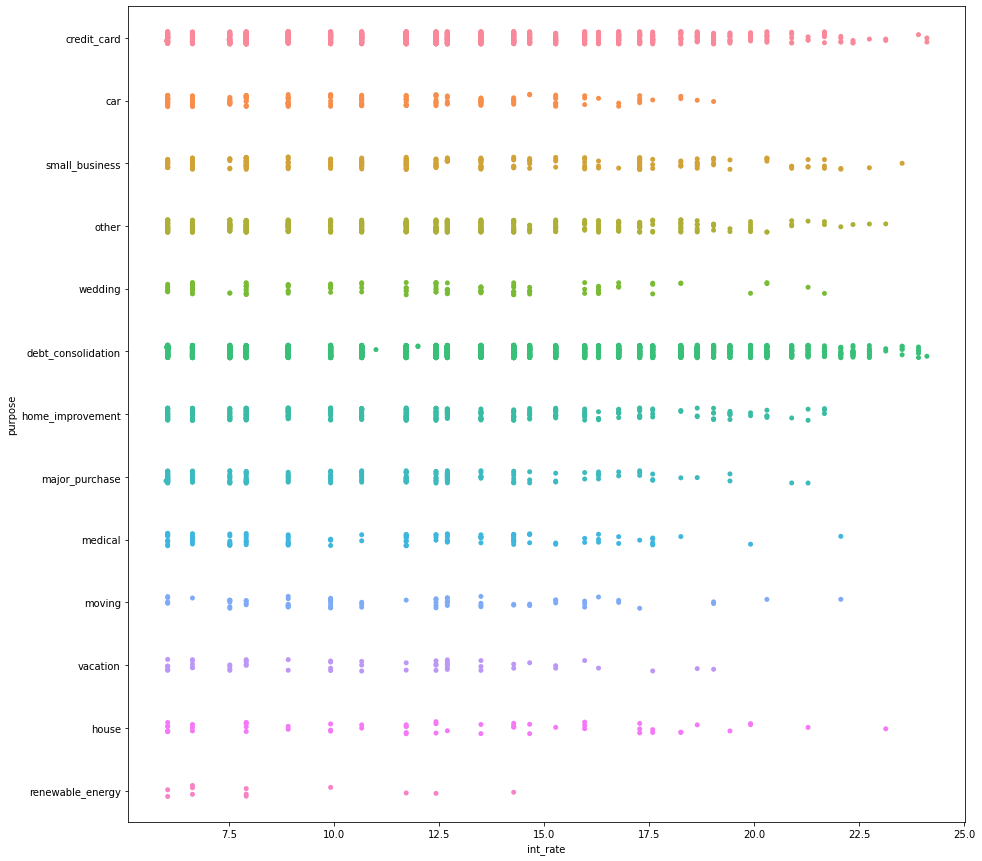

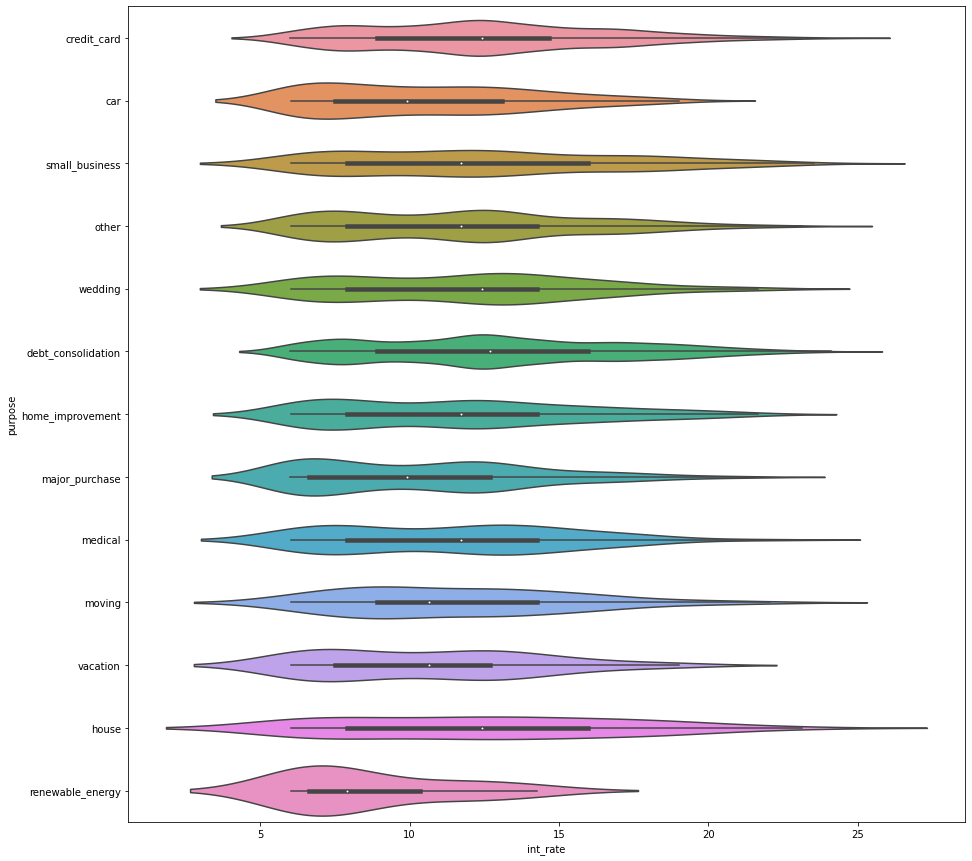

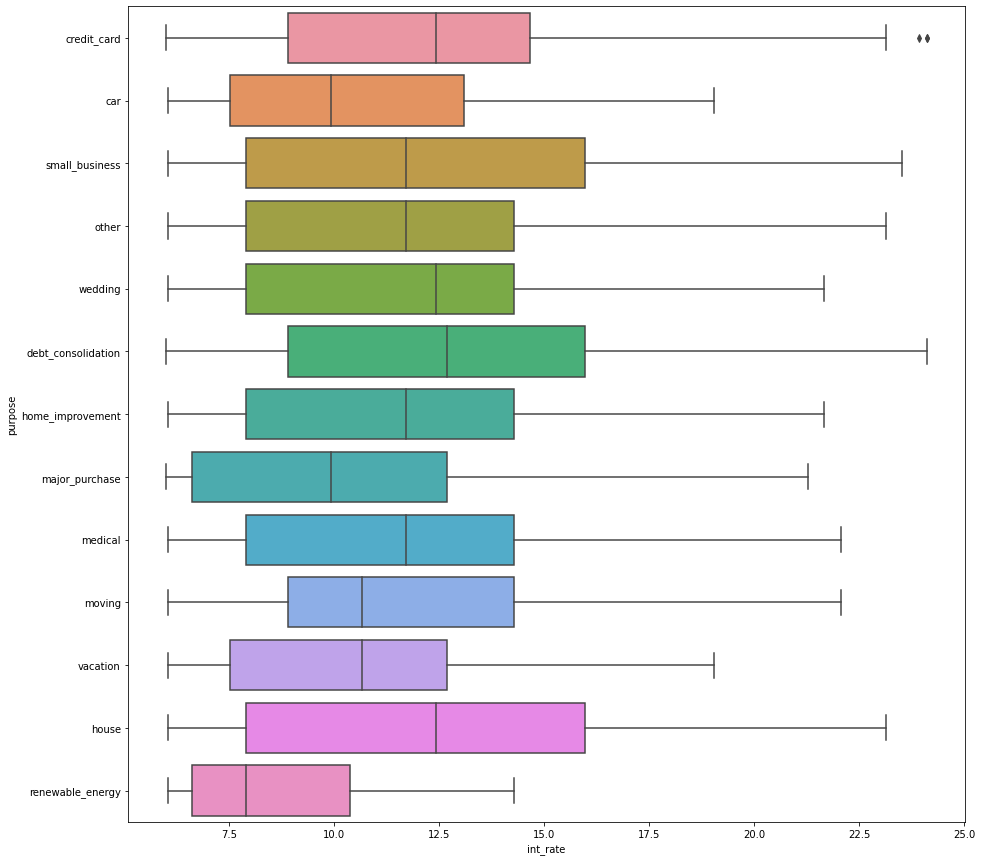

In [ ]:
plt.figure(figsize=[15,15])
sns.stripplot(x="int_rate" , y="purpose" , data=loan_new)
plt.show()

plt.figure(figsize=[15,15])
sns.violinplot(x="int_rate" , y="purpose" , data=loan_new)
plt.show()

plt.figure(figsize=[15,15])
sns.boxplot(x="int_rate" , y="purpose" , data=loan_new)
plt.show()

###Observations

Avearge interest rate is highest for small business purpose.

Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.

 Debt consolidation is 2nd where borrowers had to pay more interest rate.

###4.Grade vs Interest 

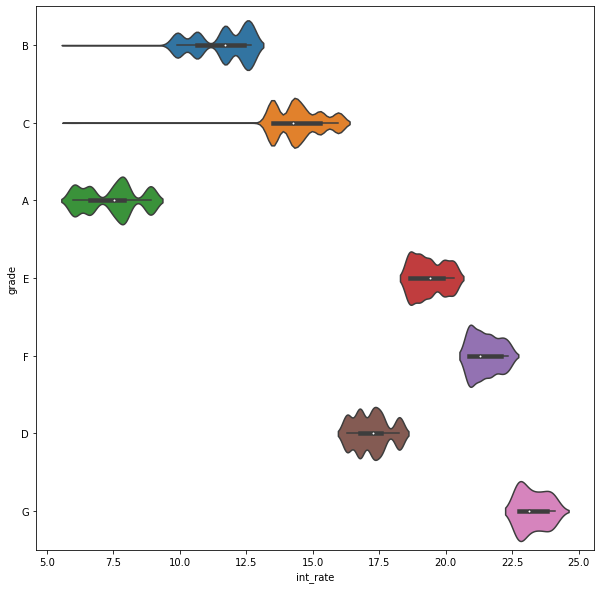

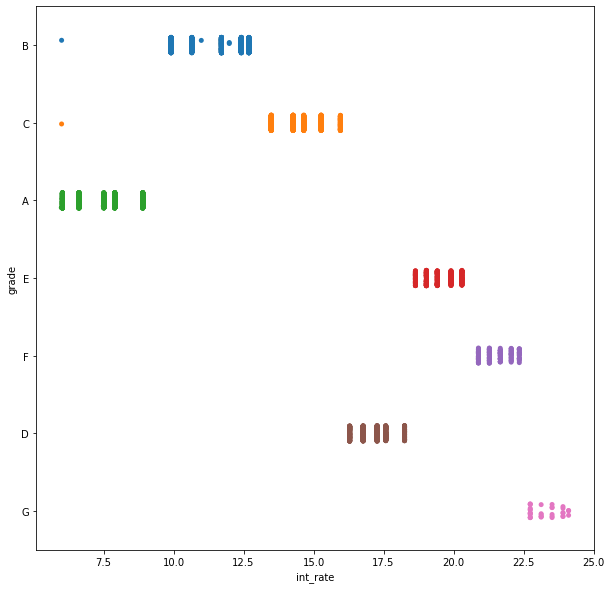

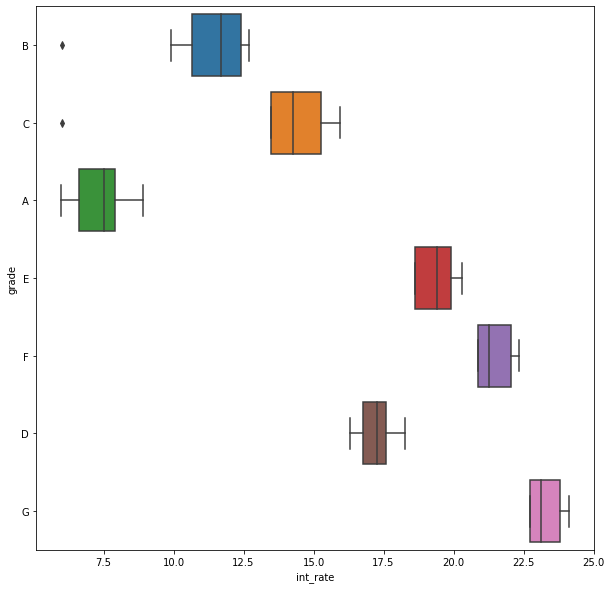

In [ ]:
plt.figure(figsize=[10,10])
sns.violinplot(x="int_rate" , y="grade" , data=loan_new)
plt.show()

plt.figure(figsize=[10,10])
sns.stripplot(x="int_rate" , y="grade" , data=loan_new)
plt.show()


plt.figure(figsize=[10,10])
sns.boxplot(x="int_rate" , y="grade" , data=loan_new)
plt.show()



###Observations:

 A-grade is a top letter grade for a lender to assign to a borrower.

 The higher the borrower's credit grade,the lower the interest rate offered to that borrower on a loan.

 It is clear that intrest rate is increasing with grades moving from A to F.

###5.Loan Amount vs Installment





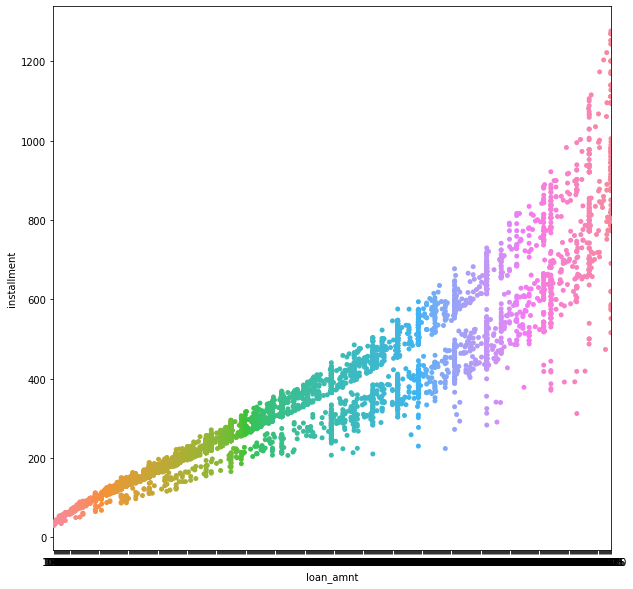

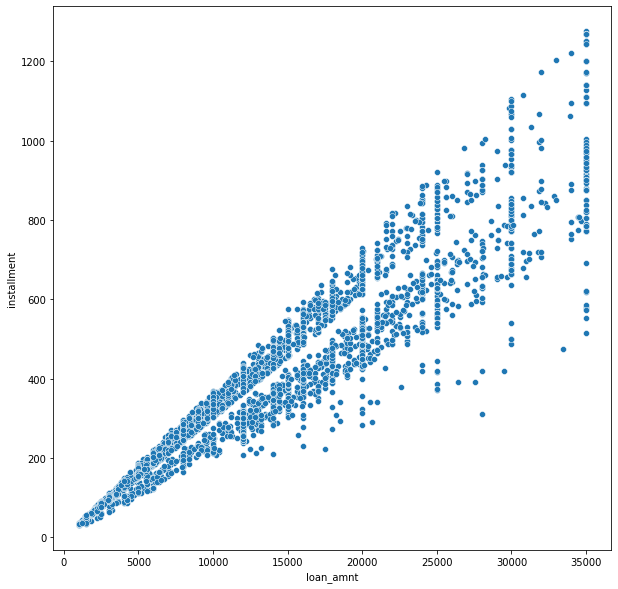

In [ ]:
plt.figure(figsize=[10,10])
sns.stripplot(x="loan_amnt" , y="installment" , data=loan_new)
plt.show()

plt.figure(figsize=[10,10])
sns.scatterplot(x="loan_amnt" , y="installment" , data=loan_new)
plt.show()


###Observations :
 
 There is a strong relationship between loan amount and installment
 
Higher the loan amount applied for, higher will be installments for the borrower.

###6.loan amount and Term in months

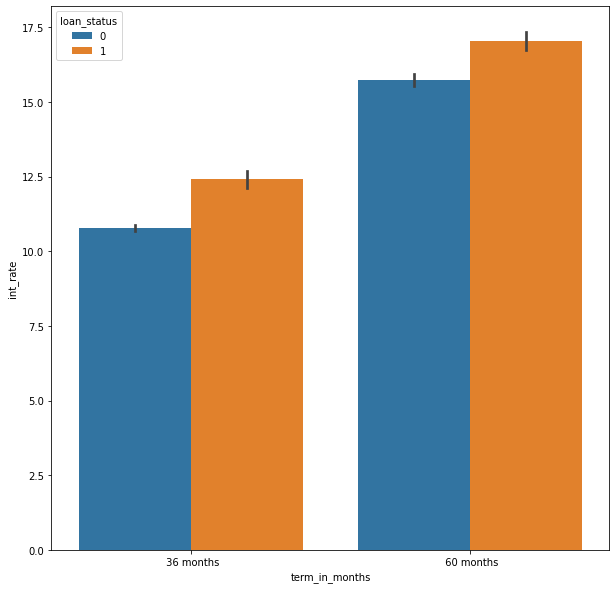

In [ ]:
plt.figure(figsize=[10,10])
sns.barplot(x="term_in_months" , y="int_rate" , hue = "loan_status" , data=loan_new)
plt.show()

###Observations:

Borrowers with term of 60 months have much greater chances of default

The reason as can be seen from the bar plot might be that as the term increases the interest rate also increases with time

###7.loan status vs dti

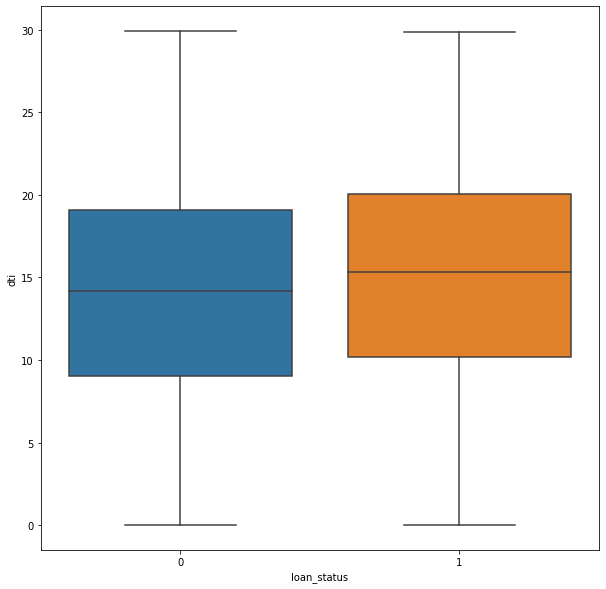

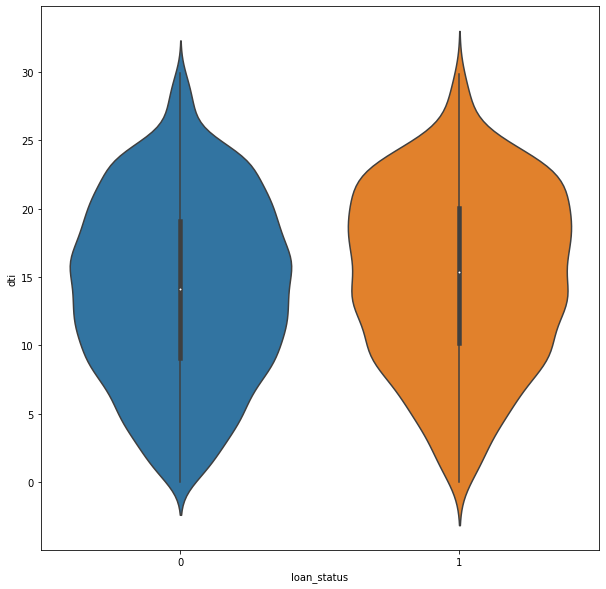

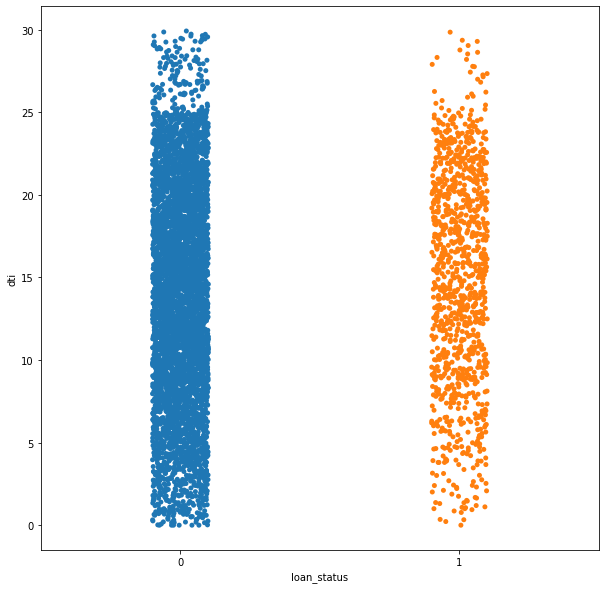

In [ ]:
plt.figure(figsize=[10,10])
sns.boxplot(x="loan_status" , y="dti" , data=loan_new)
plt.show()

plt.figure(figsize=[10,10])
sns.violinplot(x="loan_status" , y="dti" , data=loan_new)
plt.show()

plt.figure(figsize=[10,10])
sns.stripplot(x="loan_status" , y="dti" , data=loan_new)
plt.show()


###Observations:

Higher the dti higher the chances of defaulting

###8.loan status vs installment

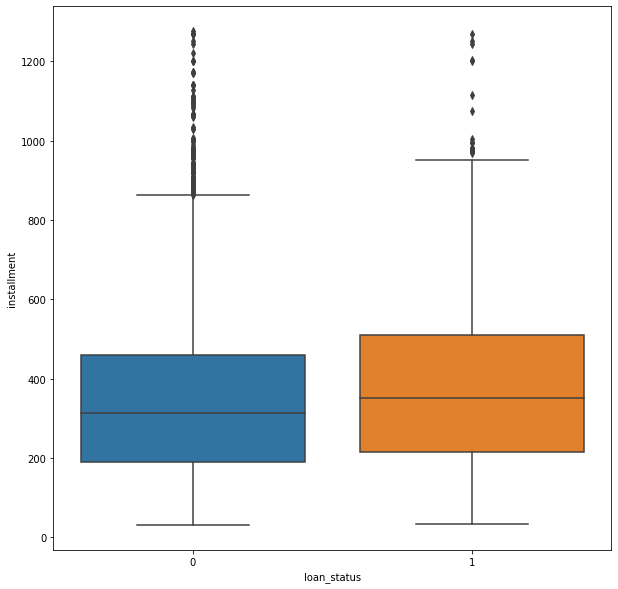

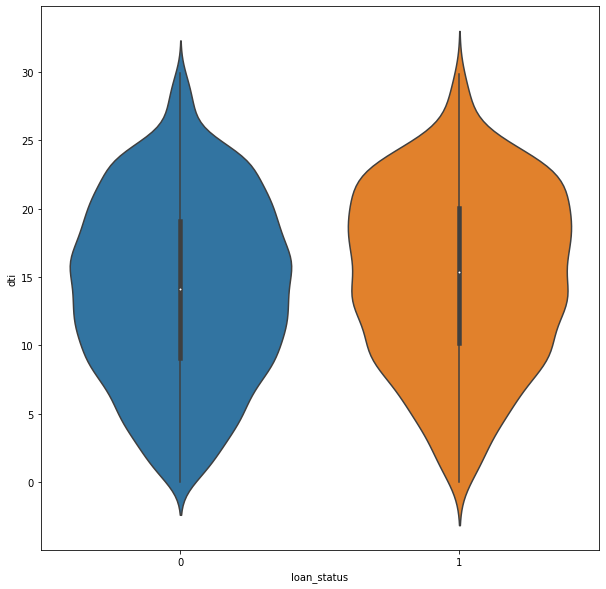

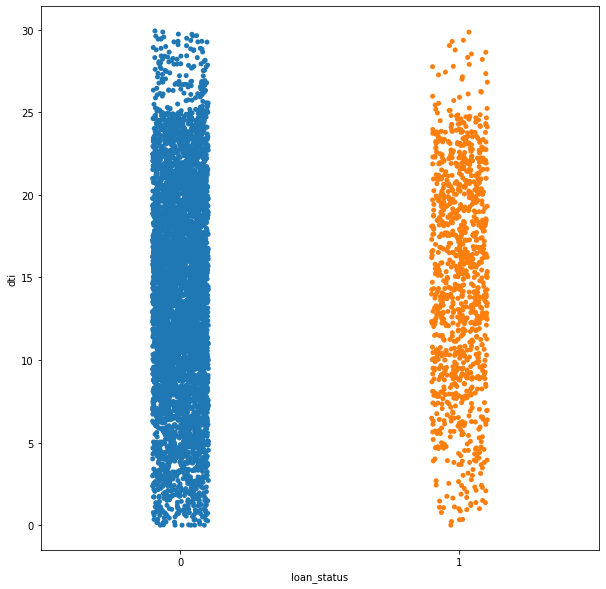

In [ ]:
plt.figure(figsize=[10,10])
sns.boxplot(x="loan_status" , y="installment" , data=loan_new)
plt.show()

plt.figure(figsize=[10,10])
sns.violinplot(x="loan_status" , y="dti" , data=loan_new)
plt.show()

plt.figure(figsize=[10,10])
sns.stripplot(x="loan_status" , y="dti" , data=loan_new)
plt.show()

###Observations:

Higher the Installment Higher the chances of defaulting

###9.loan status vs home ownership

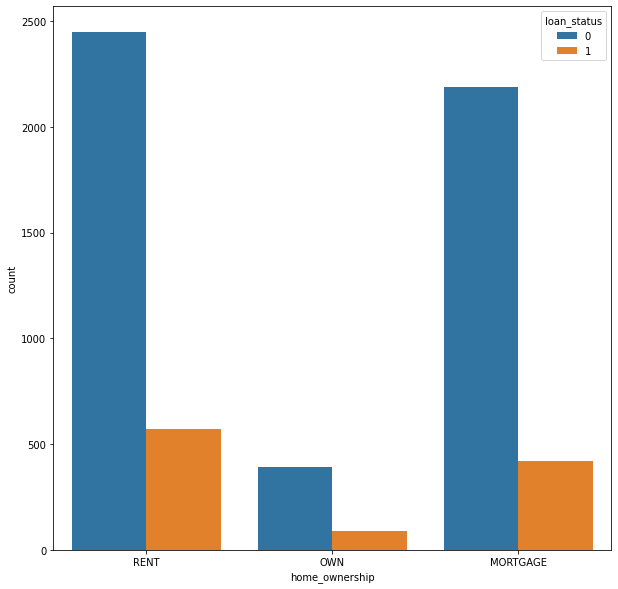

In [ ]:
plt.figure(figsize=[10,10])
sns.countplot(x="home_ownership" , hue="loan_status" , data=loan_new)
plt.show()

###Observations:

People who have stay in rent and are in mortagage are likely to be charged off 

People who have own house are less likely to be charged off compared to people who stay in rent and mortage

##Bivariate Analysis Observations

1.Borrowers with term of 60 months  has applied for have much greater chnaces of default

2.People who have stay in rent and are in mortagage are likely to be charged off 

3.People who have own house are less likely to be charged off compared to people who stay in rent and mortage


4.Median,95th percentile,75th percentile of loan amount is highest for loan taken for small business purpose among all purposes.

Debt consolidation is second and Credit card comes 3rd.

5.Avearge intrest rate is higher for 60 months loan term.

6.Most of the loans issued for longer term had higher intrest rates for repayement.

7.Avearge intrest rate is highest for small business purpose.

8.Loans taken for small business purposes had to repay the loan with more intrest rate as compared to other.

Debt consolidation is 2nd where borrowers had to pay more interest rate.
 
8.A-grade is a top letter grade for a lender to assign to a borrower.


9.There is a strong relationship between loan amount and installment higher the loan amount applied for, higher will be installments for the borrower.


10.Higher the dti higher the chances of defaulting
 
11.Higher the Installment Higher the chances 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


##Recommendations for Lending Club:
With respect to the Employment length and charged off ratio, it is observed that the many applicants under 1 year or unemployed experience charged off. So it is recommended that the lending club don't provide them with higher loan amount.

 It also helps applicants with lower interest rate and no charged off problems. Lending club should carefully decide while giving loan for applicants with Public Bankruptcy Records.


Loans for small business applicants should be reconsidered as they fall under charged off. Giving huge amount of loan with higher interest rate lead to their charged off conditions.


Loan has to be provided taking into consideration of annual income. This results in easy recovery without financial loss.


Percentage of Defaulters is found to be highest in 60 months term (~ 25%) and for 30 months (~ 11%). So, giving loan amount with shorter term should be beneficial as it would not cause loss.